In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X, y)
model.predict(X)

array([2.826802, 2.1594  , 3.650404, ..., 1.2882  , 1.4418  , 1.7342  ])

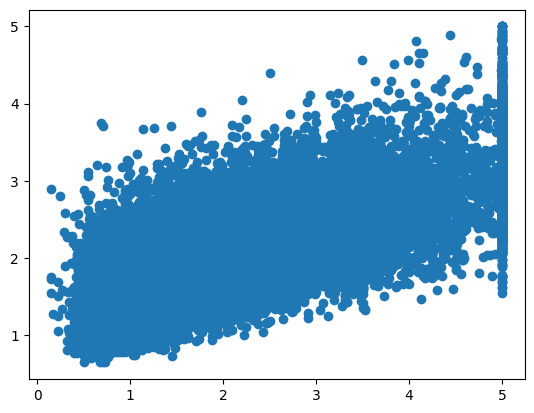

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y, model.predict(X))
plt.show()

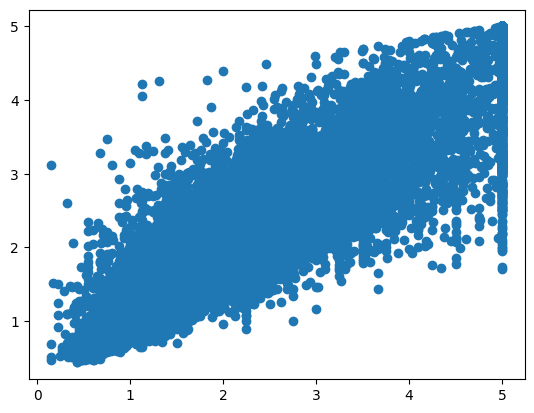

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])
model.fit(X, y)
model.predict(X)

pred = model.predict(X)
plt.scatter(y, pred)
plt.show()

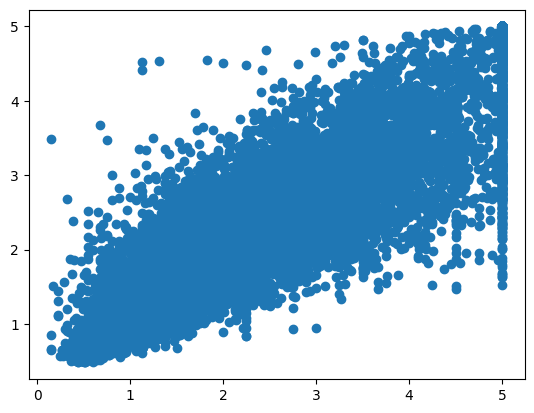

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=8,n_jobs=-1)) #n_jobs: use all available core
])
model.fit(X, y)
model.predict(X)

pred = model.predict(X)
plt.scatter(y, pred)
plt.show()

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.51546851, 0.50163982, 0.58991639, 0.50880252, 0.58914032])

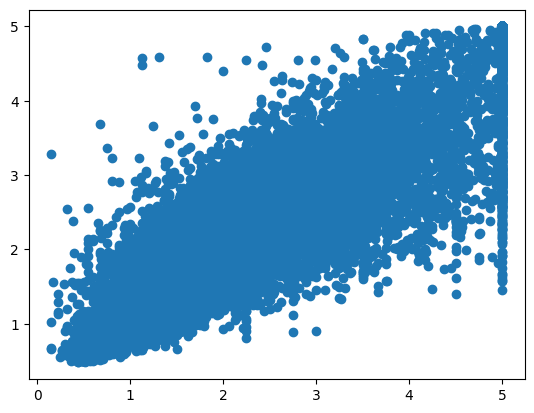

In [ ]:
#hyperparameter turning
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator=model,
             param_grid={'model__n_neighbors':range(1,10)},
             cv=5)

model.fit(X, y)
model.predict(X)

pred = model.predict(X)
plt.scatter(y, pred)
plt.show()

In [ ]:
import pandas as pd
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083504,0.023106,0.694687,0.046377,1,{'model__n_neighbors': 1},0.187329,0.088762,0.388375,0.278805,0.406689,0.269992,0.120379,9
1,0.029017,0.009354,0.332893,0.104816,2,{'model__n_neighbors': 2},0.368531,0.331973,0.504760,0.413119,0.508741,0.425425,0.071214,8
2,0.025762,0.004467,0.302282,0.029807,3,{'model__n_neighbors': 3},0.435837,0.407158,0.548467,0.468958,0.537370,0.479558,0.055419,7
3,0.024692,0.000710,0.323262,0.035569,4,{'model__n_neighbors': 4},0.462808,0.451124,0.567603,0.488509,0.560549,0.506119,0.048894,6
4,0.022891,0.000485,0.330427,0.026124,5,{'model__n_neighbors': 5},0.478794,0.476008,0.576246,0.502598,0.572286,0.521186,0.044331,5
5,0.029166,0.012213,0.432194,0.156645,6,{'model__n_neighbors': 6},0.493501,0.490363,0.584639,0.504318,0.578827,0.530330,0.042265,4
6,0.066978,0.033366,0.951326,0.278025,7,{'model__n_neighbors': 7},0.506359,0.497097,0.586361,0.508187,0.583880,0.536377,0.039984,3
7,0.066096,0.037274,0.665781,0.263684,8,{'model__n_neighbors': 8},0.515469,0.501640,0.589916,0.508803,0.589140,0.540994,0.039870,2
8,0.048306,0.016654,0.542527,0.062704,9,{'model__n_neighbors': 9},0.522309,0.506643,0.591425,0.510436,0.593730,0.544909,0.039270,1


In [ ]:
model.best_params_

{'model__n_neighbors': 9}

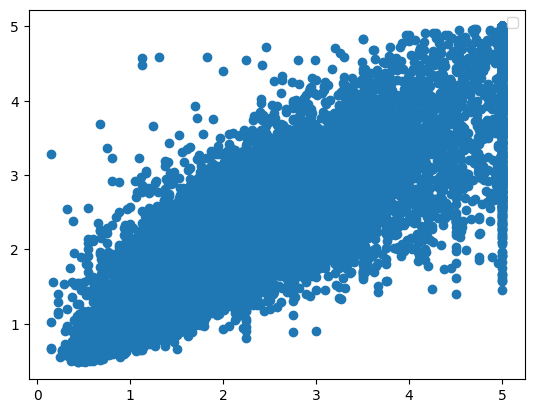

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=9,n_jobs=-1)) #n_jobs: use all available core
])
model.fit(X, y)
model.predict(X)

pred = model.predict(X)
plt.scatter(y, pred)

plt.show()

In [ ]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Functional Transformer

This allows you to apply a custom transformation function to your data within a scikit-learn pipeline.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#Defining custom transformation
def custom_standardizer(X):
  return (X-np.mean(X, axis=0))/np.std(X, axis=0) #axis=0-->column operation, axis=1-->row operation

custom_transformer = FunctionTransformer(custom_standardizer)

# Create a pipeline with the custom transformer and a classifier
pipeline =Pipeline([('custom_standardizer',custom_transformer),
                    ('classifier',RandomForestClassifier())])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


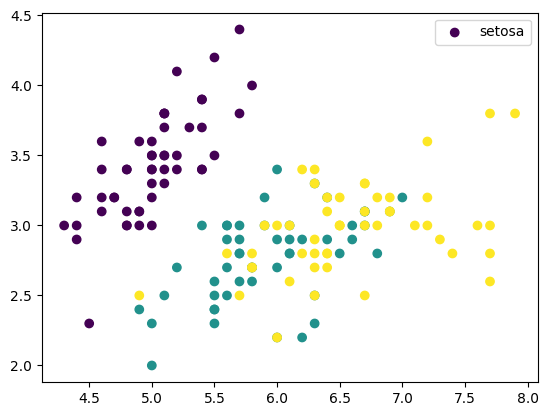

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(iris.target_names)
plt.show()

# Handling Missing Values

sklearn provides SimpleImputer and KNNImputer to handle missing values.

Simple Imputer: The SimpleImputer class can handle missing values by replacing them with a specified strategy (e.g., mean, median, most frequent, or a constant value).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

# Introduce missing values
rng = np.random.default_rng(seed=42)
missing_mask = rng.uniform(0, 1, X.shape) < 0.1  # 10% missing values
X[missing_mask] = np.nan

print(f"Original data shape: {X.shape}")
print(f"Number of missing values: {np.isnan(X).sum()}")

In [ ]:
# Define the custom standardizer function
def custom_standardizer(X):
    # Implement your standardization logic here.
    # Make sure it returns a modified array with at least one feature.
    # For example, you can standardize each feature independently:
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('custom_transformer',FunctionTransformer(custom_standardizer)),
    ('classifier', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Training data shape: (120, 4)
Testing data shape: (30, 4)
Accuracy: 0.9


KNN Imputer: The KNNImputer in scikit-learn is an imputation transformer for completing missing values using the k-nearest neighbors approach. It replaces missing values in a dataset by utilizing the mean value from the k-nearest neighbors found in the feature space

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# Introduce missing values
rng = np.random.default_rng(seed=42)
missing_mask = rng.uniform(0, 1, X.shape) < 0.1  # 10% missing values
X[missing_mask] = np.nan

print(f"Original data shape: {X.shape}")
print(f"Number of missing values: {np.isnan(X).sum()}")

Original data shape: (150, 4)
Number of missing values: 55


In [ ]:
pipeline = Pipeline([
    ('imputer',KNNImputer(n_neighbors=5)),
    ('custom_transformer',FunctionTransformer(custom_standardizer)),
    ('classifier', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Training data shape: (120, 4)
Testing data shape: (30, 4)
Accuracy: 0.9333333333333333


# Log Transformation

Its a data preprocessing technique used to make highly skewed data more normally distributed.

The logarithm can be applied to the data using different bases (e.g., natural log, base 10, etc.), but the natural logarithm (log base
𝑒
e) is the most commonly used in practice.


Reduces Skewness: Log transformation can make a right-skewed distribution more symmetric.

Stabilizes Variance: It can make the variance more constant across the range of values.

Improves Linearity: It can help meet the assumptions of linearity in linear regression models.

Handles Outliers: Log transformation can reduce the impact of outliers.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

def log_transform(X):
  return np.log1p(X) ## Use np.log1p to avoid log(0) issues (log1p(x) = log(1 + x))

log_transformer = FunctionTransformer(log_transform)

pipeline = Pipeline([
    ('log_transform',log_transformer),
    ('classifier', RandomForestClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


# Recipocal Transform

The reciprocal transformation is a mathematical transformation applied to a dataset where each value x,
x in the dataset is transformed to 1/x
 .This transformation is useful in various scenarios, particularly when dealing with skewed data or data with a hyperbolic relationship.

Reducing Skewness: It can help to reduce right skewness in data.

Handling Outliers: It can diminish the impact of large values and outliers.

Improving Linearity: It can help linearize relationships between variables in regression models.

Zero Values: The reciprocal transformation is undefined for zero values. You need to handle or adjust zero values in your dataset before applying this transformation.

Negative Values: The reciprocal of negative values is also negative, which might be useful or not depending on the context.





Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


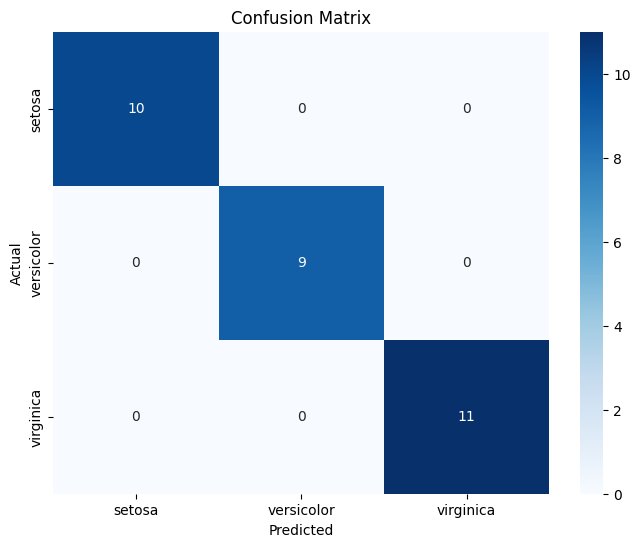

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

def recipocal_transform(X):
  return 1/X

X = X+1e-9 #to avoid 1/0

pipeline = Pipeline([
    ('recipocal_transform',FunctionTransformer(recipocal_transform)),
    ('classifier', RandomForestClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Square and SQRT Transformation

Square and square root transformations are mathematical transformations applied to data to alter its distribution. These transformations can help in stabilizing variance, making the data more normally distributed, and improving the performance of certain machine learning models.

Square Transformation
The square transformation involves raising each data value to the power of 2. This transformation can help to handle left-skewed data (negatively skewed).

Square Root Transformation
The square root transformation involves taking the square root of each data value. This transformation can help to handle right-skewed data (positively skewed).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

def square_transform(X):
  return np.square(X) #Applying square transform for handling left skewed data

def sqrt_transform(X):
  return np.sqrt(X) #Applying sqrt transform for andling right skewed data

square_pipeline = Pipeline([
    ('square_transform',FunctionTransformer(square_transform)),
    ('classifier', RandomForestClassifier())
])

sqrt_pipeline = Pipeline([
    ('sqrt_transform',FunctionTransformer(sqrt_transform)),
    ('classifier', RandomForestClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipelines
square_pipeline.fit(X_train, y_train)
sqrt_pipeline.fit(X_train, y_train)

# Make predictions and evaluate the models
y_pred_square = square_pipeline.predict(X_test)
y_pred_sqrt = sqrt_pipeline.predict(X_test)

accuracy_square = accuracy_score(y_test, y_pred_square)
accuracy_sqrt = accuracy_score(y_test, y_pred_sqrt)

print(f'Accuracy with square transformation: {accuracy_square}')
print(f'Accuracy with square root transformation: {accuracy_sqrt}')



Accuracy with square transformation: 1.0
Accuracy with square root transformation: 1.0


# Power Transformer

A power transformer is a method used to stabilize variance and make data more normally distributed. It applies a power transformation to each feature in a dataset. In the context of scikit-learn, the PowerTransformer provides a way to perform these transformations. It supports two types of power transformations: Box-Cox and Yeo-Johnson.

Box-Cox Transformation: Suitable for positive data and can help in making the data more normally distributed.

Yeo-Johnson Transformation: Can handle both positive and negative data and is useful for data with zero or negative values.

Box-Cox Transformation (Requires all the data values to be positive)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

pipeline_bc = Pipeline([
    ('power_transformer',PowerTransformer(method='box-cox')),
    ('classifier', RandomForestClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline_bc.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_bc = pipeline_bc.predict(X_test)
accuracy_bc = accuracy_score(y_test, y_pred_bc)
print(f'Accuracy with Box-Cox transformation: {accuracy_bc}')

Accuracy with Box-Cox transformation: 1.0


Yeo Johnson Transformation (Can handle bot positive and negative values)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

pipeline_yj = Pipeline([
    ('power_transformer',PowerTransformer(method='yeo-johnson')),
    ('classifier', RandomForestClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline_yj.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_yj = pipeline_yj.predict(X_test)
accuracy_yj = accuracy_score(y_test, y_pred_yj)
print(f'Accuracy with Yeo-Johnson transformation: {accuracy_yj}')


Accuracy with Yeo-Johnson transformation: 1.0


# Multiple Linear Regression

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     av

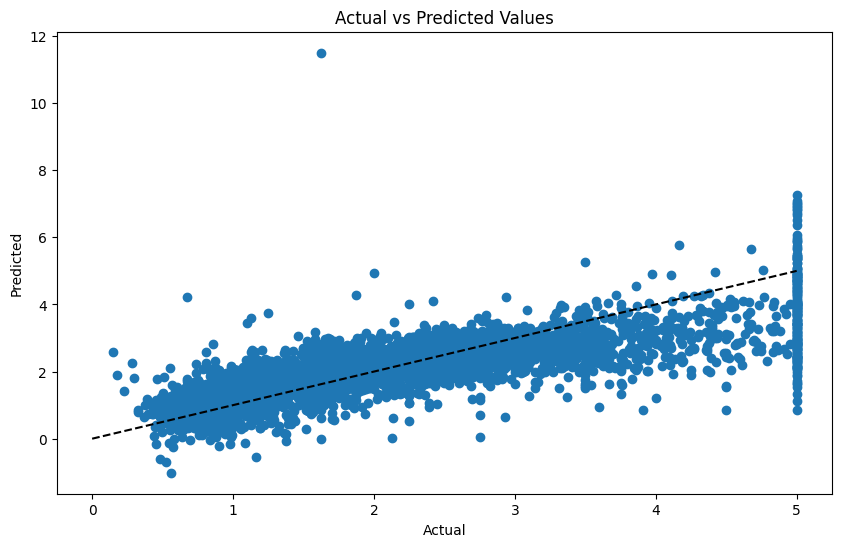

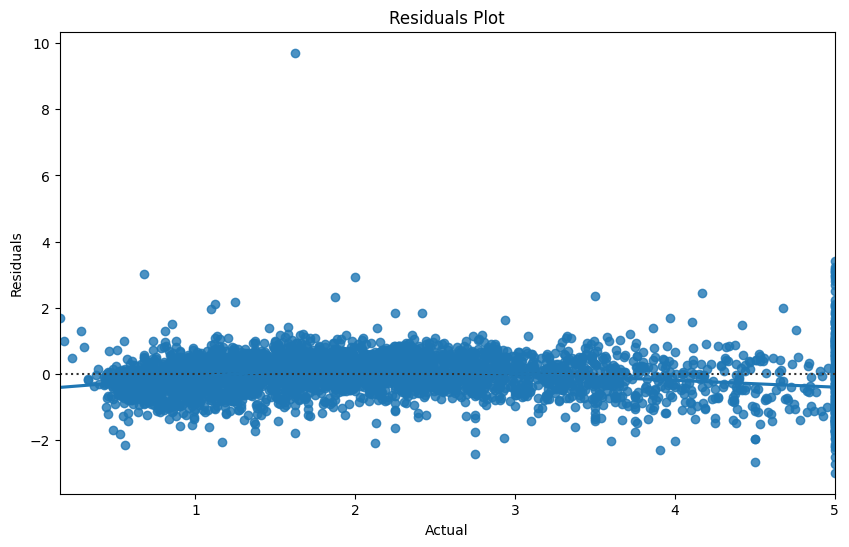

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Display the first 5 rows of the dataset
print(X.head())

# Display dataset description
print(california.DESCR)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 5], [0, 5], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 6))
# Pass y_test and y_pred as keyword arguments
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

Regression Analysis: Regression analysis is a statistical method used to examine the relationship between two or more variables. The primary objective is to model and understand how the dependent variable (Y) (also known as the outcome or response variable) changes when any one of the independent variables (also known as predictors or explanatory variables)(X) is varied, while the other independent variables are held fixed.

Inference : It aims to understand the underlying relationships between variables in a dataset. Primary focus is on estimating parameters of a model and determining the statistical signifiance of this parameters. It seeks to draw conclusion about the population from which the sample is drawn.
Typical question include, is there a significant relationsip between X and Y ? what is the effect of X on Y ?

Common techniques involves : hypothesis testing, confidance interval, p values.

Prediction: It aims to forecast or predict future values of the dependent variable based on the independent variables.The primary focus is on the accuracy of the predictions rather than understanding the underlying relationships. It seeks to make accurate forecasts for new, unseen data. Typical questions include "What will the value of Y be for a given X?" or "How can we best predict future sales based on past data?"Common techniques involve machine learning algorithms, cross-validation, and performance metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).



# Using Statsmodels for Regression Analysis.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
df = df.dropna()  # Drop rows with missing values

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# We will predict 'mpg' using 'horsepower' and 'weight'
X = df[['horsepower', 'weight']]
y = df['mpg']

# Add a constant to the predictor variable set (statsmodels requires it for the intercept)
X = sm.add_constant(X)

#fit the LR Model
model = sm.OLS(y,X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          3.06e-104
Time:                        08:41:18   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

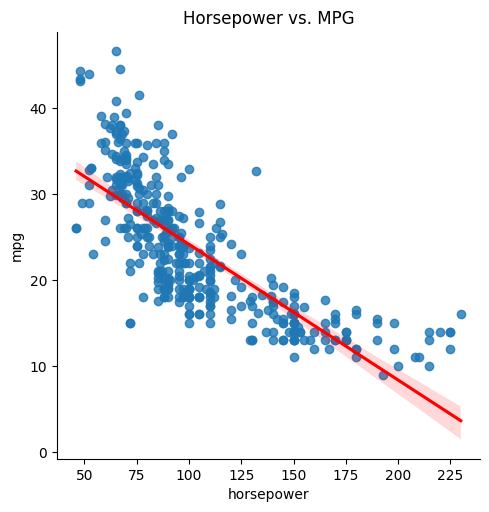

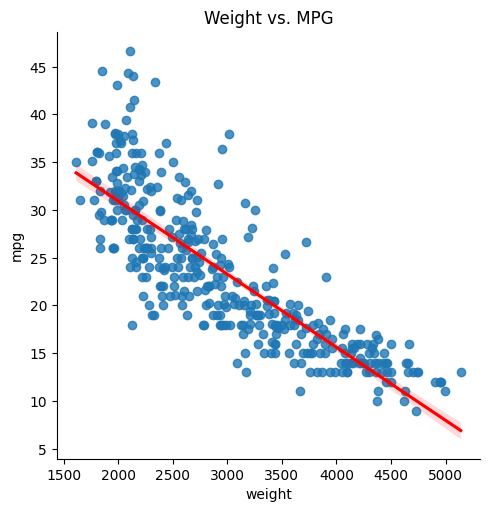

In [ ]:
# Predicted values
df['predicted_mpg'] = model.predict(X)

# Scatter plot with regression line
sns.lmplot(x='horsepower', y='mpg', data=df, line_kws={'color': 'red'})
plt.title('Horsepower vs. MPG')
plt.show()

sns.lmplot(x='weight', y='mpg', data=df, line_kws={'color': 'red'})
plt.title('Weight vs. MPG')
plt.show()

Total Sum of Squared (TSS), Explained Sum of Squares (ESS), Residual Sum of Squares (RSS)

TSS = ESS + RSS

R_squared = ESS/TSS = 1-(RSS/TSS)

An R_squared values close to 1 indiates that the model explains a large portion of the variability where as an R_squared value close to 0 indicates that the model explains very little of the variability.

R_squared is also called goodness of fit and coefficient of determination.

Adjusted R_squared penalizes the addition of extra predictors that do not improve the models fit. Unlike R_squared, it always increases as more predictors are added, but adjusted R_squared increases only if the new predictor improves the model more than would be expected by chance.



In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
df = df.dropna()  # Drop rows with missing values

# Prepare the data
X = df[['horsepower', 'weight']]
y = df['mpg']
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Extract R-squared and adjusted R-squared
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print(f'R-squared: {r_squared}')
print(f'Adjusted R-squared: {adjusted_r_squared}')


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          3.06e-104
Time:                        08:54:30   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

Degree of Freedom : Degree of freedom represents the number of independent pieces of information available for estimating a parameter or making statistial inference. It refers to the number of values in a calculation that are free to vary without violating any given constraints.

T-tests: In a t-test comparing the means of two groups, degrees of freedom typically correspond to n1+n2-2 where n1 and n2 are the sample sizes of the two groups.

Chi-Square Tests: In a chi-square test of independence, degrees of freedom are calculated based on the number of categories in the variables being compared.

Regression Analysis: In linear regression, degrees of freedom are used in the calculation of sums of squares and in determining the statistical significance of the regression coefficients.

Impact on Distribution: Degrees of freedom affect the shape and properties of probability distributions associated with statistical tests. For example, the t-distribution has a different shape for different degrees of freedom.

In a simple linear regression with one predictor variable, the degrees of freedom for the error term (Residual Sum of Squares, RSS) would typically be n-2, where n is the number of observations, and 2 accounts for the intercept and one predictor.

In an ANOVA (Analysis of Variance) test with three groups, the degrees of freedom for the groups would be k-1 (where k is the number of groups), and the degrees of freedom for the error term would be n-k (where n is the total number of observations).

# Polynomial Regression

Polynomial regression is a form of regression analysis where the relationship between the independent variable X and the dependent variable Y is modeled as an n-th degree polynomial.

Linear regression assumes a linear relationship between the independent and dependent variables. However, many real-world relationships are non-linear. Polynomial regression allows us to capture and model these non-linear relationships more accurately.

Using Statsmodels

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     862.4
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.68e-62
Time:                        09:14:41   Log-Likelihood:                -294.90
No. Observations:                 100   AIC:                             595.8
Df Residuals:                      97   BIC:                             603.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9029      0.703     -1.284      0.2

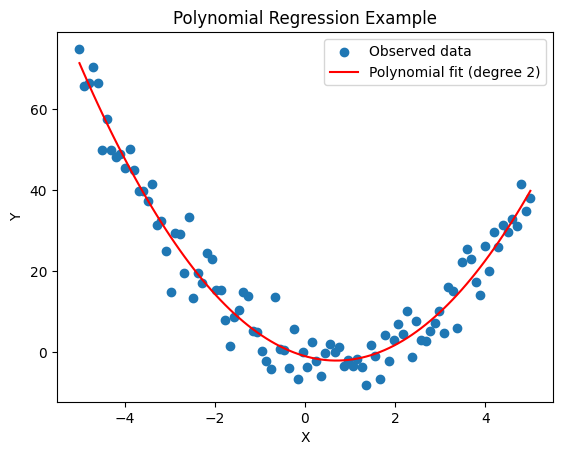

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Generate some synthetic data
np.random.seed(0)
X = np.linspace(-5, 5, 100)
Y = 2 * X**2 - 3 * X + 1 + np.random.normal(0, 5, 100)

# Create a DataFrame
df = pd.DataFrame({'X': X, 'Y': Y})

# Fit a quadratic polynomial regression model (degree 2)
df['X^2'] = df['X']**2
X_poly = sm.add_constant(df[['X', 'X^2']])
model = sm.OLS(df['Y'], X_poly).fit()

# Print model summary
print(model.summary())

# Predicted values
df['Y_pred'] = model.predict(X_poly)

# Plotting the results
plt.scatter(df['X'], df['Y'], label='Observed data')
plt.plot(df['X'], df['Y_pred'], color='red', label='Polynomial fit (degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

Using sklearn

Training RMSE: 0.82
Test RMSE: 0.84


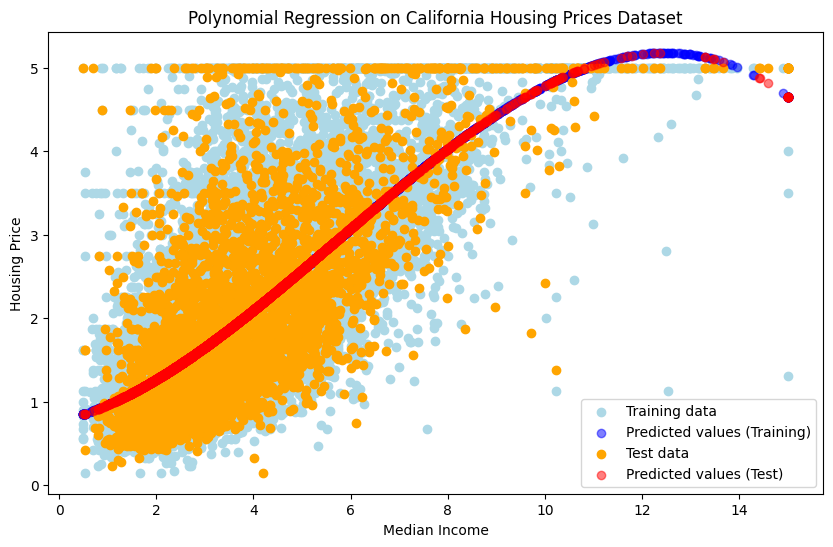

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()
california_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_df['PRICE'] = california_housing.target  # Add the target variable (housing prices)

# Selecting features and target variable
X = california_df[['MedInc']]  # Median income
y = california_df['PRICE']  # Housing prices

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial regression with degree 3

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicting on training and test set
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Training data
plt.scatter(X_train['MedInc'], y_train, label='Training data', color='lightblue')
plt.scatter(X_train['MedInc'], y_train_pred, label='Predicted values (Training)', color='blue', alpha=0.5)

# Test data
plt.scatter(X_test['MedInc'], y_test, label='Test data', color='orange')
plt.scatter(X_test['MedInc'], y_test_pred, label='Predicted values (Test)', color='red', alpha=0.5)

plt.title('Polynomial Regression on California Housing Prices Dataset')
plt.xlabel('Median Income')
plt.ylabel('Housing Price')
plt.legend()
plt.show()


Assumptions of Linear Regression:

Linearity: The relationship between the dependent variable (Y) and the independent variables (Xs) should be linear. This means that changes in Y due to changes in Xs are constant across all levels of X.

Independence of Errors: The errors (residuals) should be independent of each other. This assumption implies that there should be no correlation between consecutive errors. In other words, the value of one residual should not provide information about the value of another residual.

Homoscedasticity (Constant Variance of Errors): The variance of the errors should be constant across all levels of the independent variables. This means that the spread of the residuals should be uniform as you move along the range of predicted values.

Normality of Errors: The errors (residuals) should be normally distributed. This assumption is important for conducting hypothesis tests and constructing confidence intervals for the regression coefficients.

No Multicollinearity: The independent variables should not be highly correlated with each other. Multicollinearity can lead to unreliable estimates of regression coefficients and inflated standard errors.

No Perfect Multicollinearity: One of the independent variables should not be a perfect linear combination of other independent variables. Perfect multicollinearity makes it impossible to estimate the regression coefficients.

Creating te model

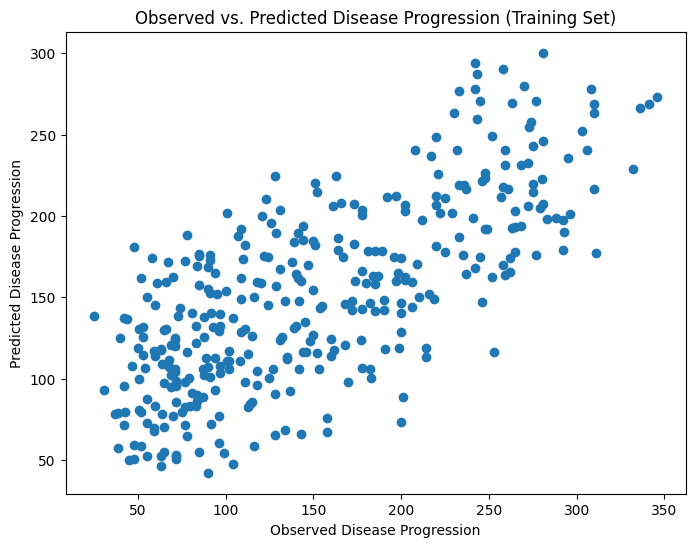

Durbin-Watson Statistic: 1.8721610423961723


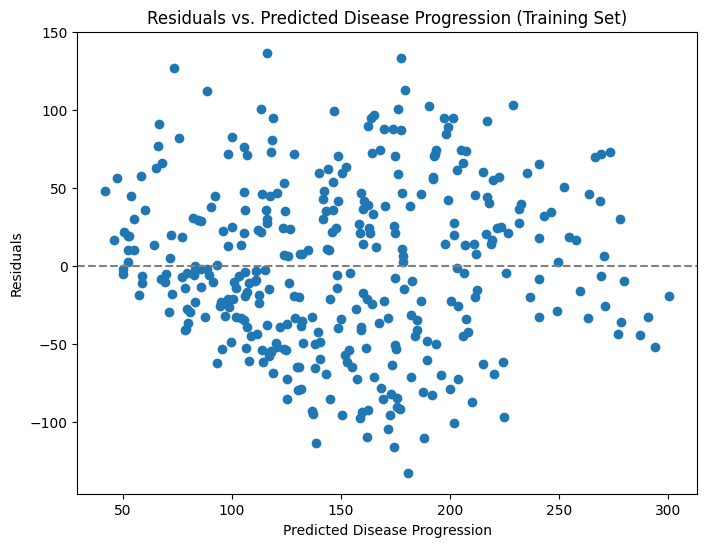

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


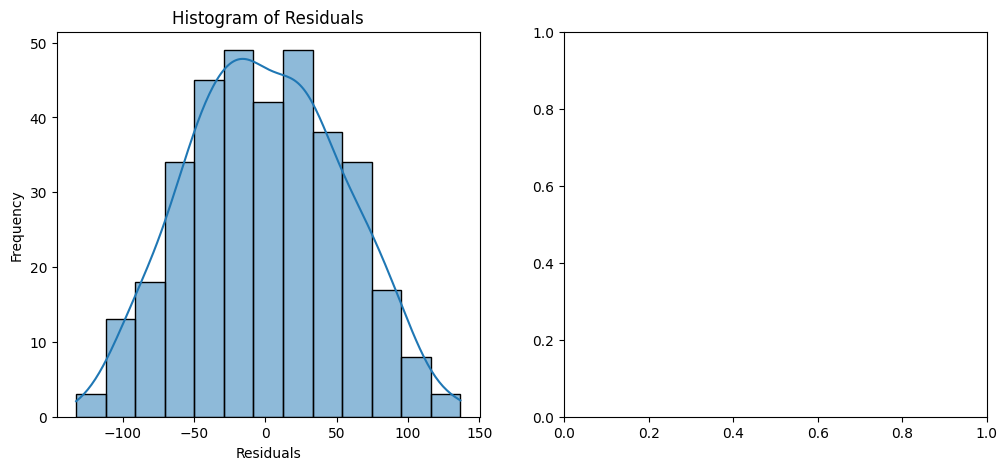

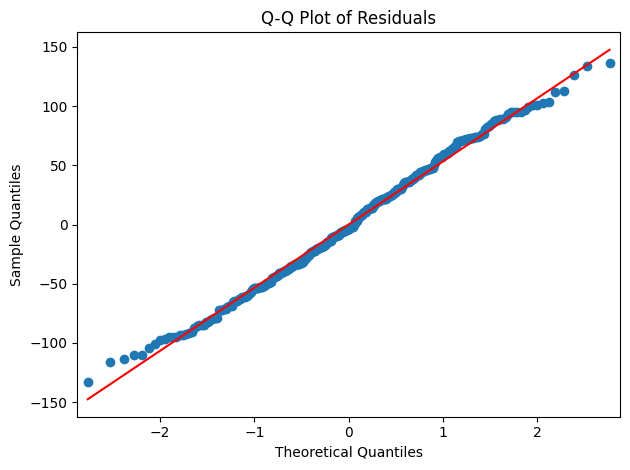

  Variable        VIF
0    const   1.000000
1      age   1.205380
2      bmi   1.478660
3       bp   1.407578
4       s1  59.062508
5       s2  39.123245
6       s3  15.369272
7       s4   8.833675
8       s5  10.075391
9       s6   1.476845
Breusch-Pagan test p-value: 0.0019362368520007434
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     44.09
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.80e-52
Time:                        09:36:14   Log-Likelihood:                -1904.5
No. Observations:                 353   AIC:                             3829.
Df Residuals:                     343   BIC:                             3868.
Df Model:                           9                                       

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target  # Add the target variable (progression of disease)

# Selecting features and target variable
X = diabetes_df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]  # Example features
y = diabetes_df['target']  # Progression of disease

# Add constant for intercept
X = sm.add_constant(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Check assumptions

# 1. Linearity: Observed vs. Predicted plot
y_train_pred = model.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel('Observed Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title('Observed vs. Predicted Disease Progression (Training Set)')
plt.show()

# 2. Independence of Errors: Durbin-Watson test
durbin_watson_stat = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')
# Rule of thumb: Values around 2 indicate no significant autocorrelation.
#Values between 1.5 and 2.5 generally indicates no significant autocorrelation.

# 3. Homoscedasticity: Residuals vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, model.resid)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Disease Progression')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Disease Progression (Training Set)')
plt.show()

# 4. Normality of Residuals: Histogram and Q-Q plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(model.resid, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(model.resid, line='s', color='b')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# 5. Multicollinearity: Variance Inflation Factors (VIF)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
#VIF value greater than 10 indicates that high multicolinearity.

# 6. Heteroscedasticity: Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, X_train)
print(f'Breusch-Pagan test p-value: {bp_test[1]}')
# Low p-values indicate rejection of homoscedasticity (presence of heteroscedasticity).

# Summary of the regression model
print(model.summary())


Condition Number: The condition number is a measure used to assess how sensitive a matrix is to changes in its coefficients or elements.

The condition number of a matrix indiates how much the output (E.g. solution to linear equations or coefficient of regression) can change for a small can change in input( datapoints or coefficients).

A large condition number indicates that the matrix is ill-conditioned, meaning small changes in the input can result in large changes in the output. Conversely, a small condition number indicates that the matrix is well-conditioned, and small changes in the input lead to proportionally small changes in the output.

High Condition Number: If the design matrix (X matrix) has a high condition number, it suggests that the independent variables (features) are highly correlated, leading to multicollinearity. This can make the regression coefficients sensitive to small changes in the data and less reliable.

Low Condition Number: A low condition number indicates that the independent variables are less correlated, making the regression coefficients more stable and reliable.

condition_number = matrix(A)*inverse(matrix(A))

In [ ]:
#Finding Out Condition Number:
import numpy as np

# Create a sample matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 10]])

# Calculate the condition number using the default norm (2-norm)
condition_number = np.linalg.cond(A)

print(f"Condition number of matrix A: {condition_number}")

Condition number of matrix A: 88.44827992069874


High Condition Number: Indicates that matrix A is ill-conditioned, meaning small changes in its elements can lead to large changes in its inverse or solutions to linear equations.

Low Condition Number: Indicates that matrix A is well-conditioned, implying that it is less sensitive to perturbations in its elements.

In [ ]:
condition_number_frobenius = np.linalg.cond(A, p='fro')
print(f"Condition number (Frobenius norm) of matrix A: {condition_number_frobenius}")

Condition number (Frobenius norm) of matrix A: 90.78423749626242


Removing Multicolinearity:
1. Using Lasso & Ridge Regression (Regularization)
2. Identifying the pairs or groups of variables with hi correlation, typically correlation coeficient greater than 0.7 and remove one variable from each pair or groups.
3. Combine or Aggregate variables using PCA.
4. Calculate VIF for each independent variables (VIF>10) and and remove te independent variables from model whose VIF>10.


# Feature Selection

Reason For Feature Selection:
1. Improved Model Performance & Overfitting.

2. Enhanced Interpretebility
3. Reduce Computational Effiiency
4. Reduce Noise & Make model more robust.

Method of Feature Selection:
1. Filter Method : Evaluate each feature individually using statistical tests (e.g., correlation, chi-squared) and select the best subset based on some criterion.

2. Wrapper Method : Evaluate multiple subsets of features based on model performance (e.g., forward selection, backward elimination) and select the subset that optimizes a chosen metric.

3. Embedded Method : Feature selection is integrated into the model training process itself (e.g., regularization methods like Lasso, Ridge regression), where coefficients of less important features are penalized.


Example of Filter Method :

Besides chi-squared, you can use other filter methods such as correlation coefficient (SelectKBest with f_regression for regression tasks), mutual information (mutual_info_classif or mutual_info_regression), or variance thresholding (VarianceThreshold).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply chi-squared test for feature selection
# Select the top 10 features
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print selected feature names (optional)
feature_names = breast_cancer.feature_names
selected_feature_names = np.array(feature_names)[selector.get_support()]
print(f"Selected features: {selected_feature_names}")

# Train a classifier on selected features
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_selected, y_train)

# Predict and evaluate performance
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")


Selected features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']
Accuracy with selected features: 0.96


Wrapper Method

Wrapper methods in feature selection involve evaluating different subsets of features using a specific machine learning model and selecting the subset that maximizes model performance. Common techniques include Forward Selection, Backward Elimination, and Recursive Feature Elimination (RFE).

We initialize Recursive Feature Elimination (RFE) with the logistic regression model (RFE(model, n_features_to_select=10, step=1)). Here, n_features_to_select specifies the number of features to select, and step specifies the number of features to remove at each iteration (default is 1).

We retrieve the indices of the selected features (rfe.support_) and print their names from the feature_names array.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize logistic regression model
model = LogisticRegression(max_iter=10000)

# Initialize RFE with the logistic regression model
# Select the top 10 features
rfe = RFE(model, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get selected feature indices
selected_indices = np.where(rfe.support_)[0]

# Print selected feature names (optional)
feature_names = breast_cancer.feature_names
selected_feature_names = np.array(feature_names)[selected_indices]
print(f"Selected features: {selected_feature_names}")

# Transform X data to include only selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train a classifier on selected features
model.fit(X_train_selected, y_train)

# Predict and evaluate performance
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")


Selected features: ['mean radius' 'mean concavity' 'mean symmetry' 'texture error'
 'worst perimeter' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']
Accuracy with selected features: 0.93


Embedded Method :

Embedded methods for feature selection integrate feature selection directly into the model training process. These methods automatically select the most relevant features during model training, typically by penalizing or regularizing the coefficients of less important features. Common embedded methods include Lasso (L1 regularization), Ridge (L2 regularization), and Elastic Net regression.

Regularization Parameter: Adjust alpha in Lasso regression to control the amount of regularization. Higher values of alpha lead to more features with coefficients set to zero, resulting in sparser models.

Model Selection: Besides Lasso, you can apply other regularization techniques like Ridge regression (Ridge in sklearn.linear_model) or Elastic Net (ElasticNet in sklearn.linear_model), which combine L1 and L2 penalties.

Cross-Validation: Use cross-validation techniques (GridSearchCV or RandomizedSearchCV from sklearn.model_selection) to tune hyperparameters like alpha for better model performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization parameter (lambda)

# Fit Ridge regression
ridge_reg.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", ridge_reg.coef_)
print("Intercept:", ridge_reg.intercept_)

# Evaluate model performance
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Coefficients: [  21.34794489  -72.97401935  301.36593604  177.49036347    2.82093648
  -35.27784862 -155.52090285  118.33395129  257.37783937  102.22540041]
Intercept: 151.9441509473086
Mean Squared Error: 3379.41
R-squared: 0.34
